In [1]:
#基本盤
import pandas as pd
import numpy as np

#視覺化
import matplotlib.pyplot as plt
import seaborn as sns

資料說明：
This is a binary classification task, You are evaluated on classification accuracy (the percentage of labels you predict correctly).  The training set has 1000 samples and the testing set has 9000.  Your prediction should be a 9000 x 1 vector of ones or zeros. You also need an Id column (1 to 9000) and should include a heade

也就是說這是一個分類問題，所以我決定使用隨機森林或是KNN

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import warnings
#不加也沒關係，礙於強迫症所以加上去
warnings.filterwarnings('ignore')

In [41]:
data_dir = '/Users/bananaiselite/data-science-london-scikit-learn/'
train = pd.read_csv(data_dir + 'train.csv',header=None)
test = pd.read_csv(data_dir + 'test.csv',header=None)
trainLabels = pd.read_csv(data_dir + 'trainLabels.csv',header=None)

In [42]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [43]:
print(f'train shape{train.shape}')
print(f'test shape{test.shape}')
print('trainLabel shape:', trainLabels.shape)

train shape(1000, 40)
test shape(9000, 40)
trainLabel shape: (1000, 1)


In [6]:
train.describe()

,0.29940251144353242,-1.2266241875260637,1.4984250500215328,-1.1761503610375272,5.2898525545597037,0.20829711393323402,2.4044983672405826,1.5945062220589785,-0.051608163273514231,0.66323431039687908,...,-0.85046544625016463,-0.62298999638261954,-1.8330573433160038,0.29302438506869571,3.5526813410266507,0.71761099417552265,3.3059719748508889,-2.7155588147154619,-2.6824085866346223,0.10105047232890663
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.025322,-0.023323,-0.025612,-0.001096,1.088127,-0.006465,0.495433,-0.039517,0.026469,-0.004264,...,0.031533,0.023598,-0.541199,-0.011913,-0.487548,0.032686,0.564443,0.009574,-0.890867,0.609960
std,1.008750,1.016094,0.978412,0.970349,4.539161,0.989601,2.119020,2.232776,1.001562,1.013808,...,1.011767,1.001668,2.240688,1.022922,2.118491,1.007316,2.227304,0.994404,2.022240,2.046400
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.670358,-0.690859,-0.700048,-0.616548,-1.805683,-0.733114,-0.839542,-1.607010,-0.680114,-0.682246,...,-0.659295,-0.696257,-2.123069,-0.664966,-1.880040,-0.643513,-1.060154,-0.689890,-2.214672,-0.565156
50%,0.023121,-0.031181,0.008037,0.003735,0.858932,0.025803,0.571475,0.017761,0.022855,-0.037531,...,0.049792,0.050187,-0.568168,-0.028179,-0.493701,0.036975,0.453544,0.038464,-0.853259,0.780175
75%,0.762980,0.683464,0.657948,0.640968,3.836911,0.671494,1.912284,1.436715,0.741949,0.666416,...,0.747815,0.700093,0.940334,0.651692,0.997741,0.690139,2.120006,0.693603,0.390982,1.994308
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   0.29940251144353242    999 non-null    float64
 1   -1.2266241875260637    999 non-null    float64
 2   1.4984250500215328     999 non-null    float64
 3   -1.1761503610375272    999 non-null    float64
 4   5.2898525545597037     999 non-null    float64
 5   0.20829711393323402    999 non-null    float64
 6   2.4044983672405826     999 non-null    float64
 7   1.5945062220589785     999 non-null    float64
 8   -0.051608163273514231  999 non-null    float64
 9   0.66323431039687908    999 non-null    float64
 10  -1.4083700642531511    999 non-null    float64
 11  1.1147436351160869     999 non-null    float64
 12  0.91041530967390116    999 non-null    float64
 13  2.2181103179158135     999 non-null    float64
 14  4.3056427290235391     999 non-null    float64
 15  0.0889

In [8]:
trainLabels.head()

,1
0,0
1,0
2,1
3,0
4,1


In [9]:
X = train
y = trainLabels.values.tolist()

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=0.2)

In [11]:
X_train.shape, X_test.shape

((799, 40), (200, 40))

**隨機森林**

In [21]:
rfc=RandomForestClassifier()

estimator=[*range(20, 80, 10)]
max_depth=[*range(20, 60, 10)]
split=[*range(5, 25, 5)]
max_feature = [*range(10, 35, 5)]
param=dict(n_estimators=estimator,max_depth=max_depth, min_samples_split=split, max_features = max_feature)
rfcCV=GridSearchCV(estimator=rfc,param_grid=param,cv=5,n_jobs=-1)
rfcCV.fit(X_train,y_train)
y_pred=rfcCV.predict(X_test)
print(rfcCV.best_params_, rfcCV.best_score_)
print('score train : ',rfcCV.score(X_train,y_train))
print('score test  : ',accuracy_score(y_pred,y_test))

{'max_depth': 40, 'max_features': 20, 'min_samples_split': 10, 'n_estimators': 50} 0.8686320754716981
score train :  0.9949937421777222
score test  :  0.895


In [13]:
distance = range(1,20)
train_acc, test_acc=[], []
best_score = 0.0

for k in distance:
    KNN = KNeighborsClassifier(n_neighbors=k,algorithm='auto',weights='uniform')
    KNN.fit(X_train, y_train)
    ypred = KNN.predict(X_test)
    
    train_score = KNN.score(X_train, y_train)
    test_score = accuracy_score(y_test,ypred)
    train_acc.append(train_score)
    test_acc.append(test_score)
    
    if test_score > best_score:
        best_score = test_score
        best_KNN = KNN

train score :  0.9599499374217773
test score :  0.93
KNeighborsClassifier(n_neighbors=3)


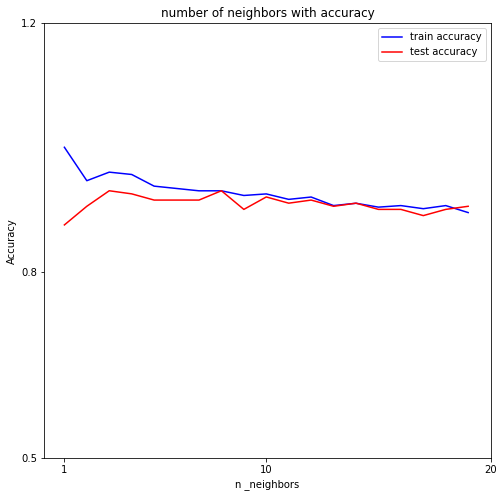

In [14]:
plt.figure(figsize=(8,8))
plt.plot(distance,train_acc,c='b',label='train accuracy')
plt.plot(distance,test_acc,c='r',label='test accuracy')
plt.legend()
plt.title('number of neighbors with accuracy')
plt.xticks([1, 10, 20]),plt.yticks([0.5, 0.8, 1.2])
plt.xlabel('n _neighbors')
plt.ylabel('Accuracy')

print('train score : ',best_KNN.score(X_train,y_train))
print('test score : ',best_score)
print(best_KNN)

In [44]:
best_RCF = RandomForestClassifier(n_estimators = 50
                                  ,min_samples_split = 10
                                  ,max_depth = 40
                                  ,max_features = 20)

In [45]:
best_KNN.fit(X_train,y_train)
print(best_KNN.predict(X_test)[0:10])
best_RCF.fit(X_train,y_train)
print(best_RCF.predict(X_test)[0:10])

[0 0 0 1 0 1 1 1 0 1]
[0 0 0 1 0 1 1 0 0 1]


In [46]:
print('Score for KNN :',cross_val_score(best_KNN,X_train,y_train,cv=10,scoring='accuracy').mean())
print('Score for Random Forest :',cross_val_score(best_RCF,X_train,y_train,cv=10,scoring='accuracy').max())

Score for KNN : 0.9036708860759493
Score for Random Forest : 0.9125


In [47]:
#FRAMING DATA 

knn_best_pred = pd.DataFrame(best_KNN.predict(test))
rf_best_pred = pd.DataFrame(best_RCF.predict(test))


knn_best_pred.index += 1
rf_best_pred.index += 1


rf_best_pred.columns = ['Solution']
rf_best_pred['Id'] = np.arange(1,rf_best_pred.shape[0]+1)
rf_best_pred = rf_best_pred[['Id', 'Solution']]
print(rf_best_pred)

#knn_best_pred.to_csv('knn_best_pred.csv')
rf_best_pred.to_csv('Submission_rf.csv', index=False)

        Id  Solution
1        1         1
2        2         0
3        3         1
4        4         0
5        5         0
...    ...       ...
8996  8996         0
8997  8997         1
8998  8998         1
8999  8999         0
9000  9000         1

[9000 rows x 2 columns]
